In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hrtrain=pd.read_csv('train_LZdllcl.csv')

In [3]:
hrtest=pd.read_csv('test_2umaH9m.csv')

In [4]:
hrtrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
hrtrain.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [6]:
hrtrain.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
hrtrain.shape

(54808, 14)

In [8]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
# Train dataset - Check Missing Values in Columns
hrtrain.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [10]:
# Test dataset - Check Missing Values in Columns 
hrtest.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [11]:
hrtest.shape

(23490, 13)

In [12]:
# Dependent Variable - is_promoted (0/1) (No/Yes)
hrtrain.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [13]:
# average age of gender
hrtrain.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [14]:
# How many Male/Female Promoted?
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [15]:
# Hypothesis Testing
# Type 1 Error - Finding Criminal Not Guilty - Accepting a False
# Hypothesis. Patient has No Covid but RTPCR Test gave Positive
# Type 2 Error - Hanging an Innocent Man - Rejecting a True 
# Hypothesis. Patient has Covid but RTPCR Test gave Negative

In [16]:
# Different types of values in previous_year_rating
hrtrain.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [17]:
# Train - Fill Null values with Mode
hrtrain.previous_year_rating=hrtrain.previous_year_rating.fillna(3.0)

In [18]:
# Test - Fill Null values with Mode
hrtest.previous_year_rating.value_counts(dropna=False)

3.0    7921
5.0    5097
4.0    4249
1.0    2680
NaN    1812
2.0    1731
Name: previous_year_rating, dtype: int64

In [19]:
#  Test - Fill Null values with Mode
hrtest.previous_year_rating=hrtest.previous_year_rating.fillna(3.0)

In [20]:
# Qualifications 
hrtrain.education.value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [21]:
# Train - Fill Null values with Mode
hrtrain.education=hrtrain.education.fillna("Bachelor's")

In [22]:
# Test - Fill Null values with Mode
hrtest.education=hrtest.education.fillna("Bachelor's")

In [23]:
# Train Data columns
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [24]:
# Test Null Average avg_traing_score of is_promoted(0/1) Equal
# groupby(), Null & Alt, Split Dataframe, Conduct test & Interpret

In [25]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [26]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).var()

is_promoted
0    168.791268
1    217.448116
Name: avg_training_score, dtype: float64

In [27]:
promotedyes=hrtrain[hrtrain.is_promoted==1]
promotedno=hrtrain[hrtrain.is_promoted==0]

In [28]:
# Null - No significant difference in Average Avg_training_score of
# is_promoted(0/1) equal.
# Alt - significant difference in Average Avg_training_score of
# is_promoted(0/1) equal.

In [29]:
from scipy.stats import ttest_ind

In [30]:
ttest_ind(promotedyes.avg_training_score,
         promotedno.avg_training_score,equal_var=False)
# Since pvalue=7.662329172468838e-291 is less than 0.05, Reject
# Null Hypothesis

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [31]:
# Test Null Average avg_traing_score of female & Male Equal
# groupby(), Null & Alt, Split Dataframe, Conduct test & Interpret

In [32]:
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [33]:
male=hrtrain[hrtrain.gender=='m']
female=hrtrain[hrtrain.gender=='f']

In [34]:
ttest_ind(male.avg_training_score,
          female.avg_training_score,equal_var=False)
# Since pvalue=9.321257169457923e-10 is less than 0.05, Reject
# Null Hypothesis

Ttest_indResult(statistic=-6.122262326710493, pvalue=9.321257169457923e-10)

In [35]:
# ttest = t statistic = (Mean1-Mean2)/sqrt((var1/n1)+(var2/n2))

In [36]:
# test Null avg_training_score of different education levels equal
# groupby(), Null & Alt, Split Dataframe, Conduct test & Interpret

In [37]:
hrtrain.avg_training_score.groupby(hrtrain.education).mean()

education
Bachelor's          63.097446
Below Secondary     64.925466
Master's & above    64.061240
Name: avg_training_score, dtype: float64

In [38]:
ug=hrtrain[hrtrain.education=="Bachelor's"]
pg=hrtrain[hrtrain.education=="Master's & above"]
bs=hrtrain[hrtrain.education=="Below Secondary"]

In [39]:
from scipy.stats import f_oneway

In [40]:
f_oneway(ug.avg_training_score,pg.avg_training_score,bs.avg_training_score)
# Since pvalue=2.873996658407989e-15 is less than 0.05, Reject
# Null Hypothesis

F_onewayResult(statistic=33.5035375621275, pvalue=2.873996658407989e-15)

In [41]:
# test Null No Association between gender & is_promoted?
# Both Categorical Variables
# Cross tabulation is input

In [42]:
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [43]:
from scipy.stats import chi2_contingency
# Since p-value = 0.0 is less than 0.05, Reject Null

In [44]:
chi2_contingency(pd.crosstab(hrtrain.is_promoted,hrtrain.gender))
# Since p-value=0.00976509 is less than 0.05, Reject null

(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428, 35217.29382572],
        [ 1389.29382572,  3278.70617428]]))

In [45]:
# MACHINE LEARNING - SUPERVISED LEARNING - CLASSIFICATION MODELS
# IF DEPENDENT VARIABLE(y) IS NON NUMERIC AND CATEGORICAL AND
# BINARY(YES/NO), THEN BINARY LOGISTIC REGRESSION IS USED.
# IF THERE ARE MORE THAN 2 LEVELS THEN MULTINOMIAL LOGISTIC
# REGRESSION IS USED.
# BINARY LOGISTIC REGRESSION -
#        EXP^(B0+B1X1+B2X2+B3X3+B4X4+..BnXn)
# P = ------------------------------------------------
#       1 + EXP^(B0+B1X1+B2X2+B3X3+B4X4+..BnXn)
# p - Probability lies between 0 & 1
# EXP - Exponential - 2.718
# B0 - Intercept or Constant
# B1,B2,B3,B4,..Bn - Coefficients
# X1,X2,X3,X4,...Xn - Independent variables
# Equation predicts predicted probability
# Classification Rule for all Classification Models
# probability greater than equal to 0.50 ---- 1 (yes)
# probability less than 0.50 ------ 0  (no)

# Assumptions
# Dependent Variable(y) must be Binary.(yes/no)
# Independent Variables can be both numerical and categorical.
# No Multicollinearity(strong correlation >0.95)
# Exogeneity 
# Sample Size is minimum 50 observations per variable

# Interpreatation of Output
# Accuracy calculated from Confusion Matrix
# intercept + Coefficients

# Confusion Matrix is a 2 X 2 matrix of Actual Class & Predicted
# class. Cross Tabulation of y and predicted y
# Actual Class is positive & Predicted class is Positive  -
# True Positive (TP)
# Actual Class is Positive but Predicted class is Negative -
# False Negative (Type II Error) (FN)
# Actual Class is Negative but Predicted class is Positive -
# False Positive (Type I Error) (FP)
# Actual Class is Negative & Predicted Class is Negative-
# True Negative (TN)

# Primary metric for all Classification Models is
#                      True positive + True negative
# Accuracy = ----------------------------------------------------
#            True positive+FalseNegative+FalsePositive+TrueNegative
# Accuracy must be between 0.70 - 0.90 

#                               True Positive
# Sensitivity or Recall = ------------------------------
#                          True Positive + False Negative
# Sensitivity must be higher closer to 1
# Sensitivity is also called as True Positive Rate (TPR)

#                 True Negative
# Specificty = ------------------------------
#                True Negative + False Positive
# Specificity is als called as True Negative Rate
# Specificity must be higher closer to 1.

#                  True positive
# Precision = -----------------------------
#                True Positive + False Positive
# Precision must be higher closer to 1

#                Precision X Recall
# F1 Score = 2 X -------------------
#                Precision + Recall


In [46]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [47]:
# Split Dataframe into Numeric data & Non Numericdata
# Preprocessing is different for Object Data & Numeric Data, hence split
objectcolumns=hrtrain[['employee_id','department','region','education','gender',
                       'recruitment_channel','previous_year_rating','KPIs_met >80%',
                       'awards_won?','is_promoted']]

In [48]:
nummericcolumns=hrtrain[['no_of_trainings', 'age','avg_training_score','length_of_service']]

In [49]:
# Label Encode
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
objectcolumnsdummy=objectcolumns.apply(le.fit_transform)

In [52]:
hrtraindf=pd.concat([nummericcolumns,objectcolumnsdummy],axis=1)

In [53]:
y=hrtraindf.is_promoted
X=hrtraindf.drop('is_promoted',axis=1)

In [54]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [55]:
logreg=LogisticRegression(max_iter=2000)
# Convergence Warning means Not All Coefficients are calculated

In [56]:
logregmodel=logreg.fit(X,y)

In [57]:
logregmodel.score(X,y) # Accuracy from Confusion Matrix

0.9148299518318493

In [58]:
logitpredict=logregmodel.predict(X)

In [59]:
# Cross tabulation of dependent variable and predicted
pd.crosstab(y,logitpredict)

col_0,0
is_promoted,
0,50140
1,4668


In [60]:
(49942+328)/(49944+198+4340+328) # Accuracy = 91.72%

0.9171683999270206

In [61]:
logregmodel.intercept_

array([-0.02314808])

In [62]:
logregmodel.coef_

array([[-4.76568867e-02, -1.13693153e-01,  1.89439589e-02,
         1.28036947e-01, -6.89971752e-06, -4.92800298e-02,
        -1.54600085e-02,  4.33077662e-02, -2.10395804e-02,
        -1.84648854e-02,  1.00232262e-01,  7.72449352e-02,
         2.37590801e-02]])

In [63]:
pd.DataFrame(logregmodel.coef_,columns=X.columns)

,no_of_trainings,age,avg_training_score,length_of_service,employee_id,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
0,-0.047657,-0.113693,0.018944,0.128037,-0.000007,-0.04928,-0.01546,0.043308,-0.02104,-0.018465,0.100232,0.077245,0.023759


In [64]:
pd.DataFrame(logregmodel.coef_,columns=X.columns).transpose()

,0
no_of_trainings,-0.047657
age,-0.113693
avg_training_score,0.018944
length_of_service,0.128037
employee_id,-0.000007
department,-0.049280
region,-0.015460
education,0.043308
gender,-0.021040
recruitment_channel,-0.018465


In [65]:
# classification_report
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     50140
           1       0.00      0.00      0.00      4668

    accuracy                           0.91     54808
   macro avg       0.46      0.50      0.48     54808
weighted avg       0.84      0.91      0.87     54808



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
# Roc curve
from sklearn.metrics import plot_roc_curve

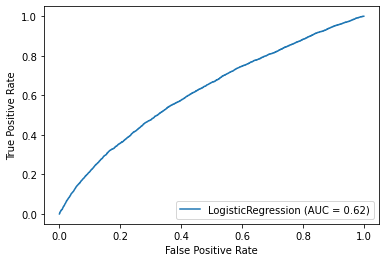

In [68]:
plot_roc_curve(logreg,X,y)
# Area Under ROC Curve (AUC) = 0.81 or 81%

In [69]:
# Machine Learning -
# Supervised Learning - Complete Understanding of Data & which 
# Machine Learning Alogorithms to Run.
# Unsupervised Learning - Don't have complete understanding of data don't 
# know what is dependent variable and don't know which algorithms to run.


In [70]:
# Decsion Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [71]:
tree=DecisionTreeClassifier(max_depth=2)

In [72]:
treemodel=tree.fit(X,y)

In [73]:
treemodel.score(X,y)   # Accuracy - 92.28%

0.9228032404028609

In [74]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [75]:
cross_val_score(tree,X,y,cv=5) # Cross Validation or Repeated Testing

array([0.92391899, 0.92163839, 0.92145594, 0.9226348 , 0.92309096])

In [76]:
(0.92391899+0.92163839+0.92145594+0.9226348+0.92309096)/5

0.922547816

In [77]:
# Ploct Tree
from sklearn.tree import plot_tree

[Text(167.4, 181.2, 'avg_training_score <= 90.5\ngini = 0.156\nsamples = 54808\nvalue = [50140, 4668]'),
 Text(83.7, 108.72, 'KPIs_met >80% <= 0.5\ngini = 0.142\nsamples = 54229\nvalue = [50069, 4160]'),
 Text(41.85, 36.23999999999998, 'gini = 0.067\nsamples = 35295\nvalue = [34064, 1231]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.262\nsamples = 18934\nvalue = [16005, 2929]'),
 Text(251.10000000000002, 108.72, 'department <= 0.5\ngini = 0.215\nsamples = 579\nvalue = [71, 508]'),
 Text(209.25, 36.23999999999998, 'gini = 0.499\nsamples = 116\nvalue = [56, 60]'),
 Text(292.95, 36.23999999999998, 'gini = 0.063\nsamples = 463\nvalue = [15, 448]')]

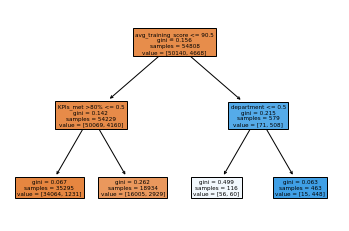

In [78]:
plot_tree(treemodel,filled=True,feature_names=X.columns)

In [79]:
hrtest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [80]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [81]:
# Split Dataframe into Numeric data & Non Numericdata
# Preprocessing is different for Object Data & Numeric Data, hence split
objectcolumns=hrtest[['employee_id','department','region','education','gender',
                      'recruitment_channel','previous_year_rating','KPIs_met >80%','awards_won?']]

In [82]:
nummericcolumns=hrtest[['no_of_trainings','age','avg_training_score','length_of_service']]

In [83]:
testobjectcolsdummy=objectcolumns.apply(le.fit_transform)

In [84]:
hrtestdf=pd.concat([nummericcolumns,testobjectcolsdummy],axis=1)

In [85]:
logitpredict=logregmodel.predict(hrtestdf)

In [86]:
pd.DataFrame(logitpredict).to_csv('logit.csv')

In [87]:
# Machine Learning - Supervised Learning - CART Model - MultiTree Models
# Ensemble Meathods - Bagging or Bootstrap Aggregating
# Algorithm - Random Forest - Random(Sampling) & Forest(Multiple trees)
# Step 1 - Specify the number of Tree to be built (n_estimators=1000)
# Step 2 - Create 1000 samples from original data using Random Sampling 
# method for observations and variables. Each sample will have 65% of 
# observations and sqrt(number of variables). Trees will not be built
# untill sampling process ends.
# Data Sampling Method used is Data with Replacement method wherein
# observations and variables appear in multiple samples thereby in
# multiple trees.
# Step 3- Upon completion of sampling decision tree building will start
# and parallely build multiple trees as each sample is independent. One
# Decision Tree for One Sample.
# Step 4 - After building Tree, prediction will also be done for each tree
# Step 5 - Aggregate Outputs of multiple trees and if it is classification
# use Majority Voting method and if it is regression using Average method
# the final prediction of observation will be decided.
# Example - Observation 205 appeared in 450 trees & 270 trees predicted 
# as O or No and 180 trees predicted as 1 or Yes. Final Prediction - No

# Tree Splitting methods -1) Gini & 2) Entropy & Information Gain
# Disadvantage - requires computing power and memory space'

# Hierarchy of Algorithms 
# Try Multiple Linear Regression (Regression) or 
#. Binary Logistic Regression (Classification)
# 2) Decision Tree
# 3) Random Forest
# 4) Gradient Boosting Machine
# 5) Neural Networks
# 6) Deep Learning

# 7) Support Vector Machines(Image Processing)
# 8) Naive Bayes (Sentiment Analysis of text)
# 9) K Nearest Neighbours (KNN Algorithm)
# Clustering Methods for Segmentation

In [88]:
#  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [89]:
RF=RandomForestClassifier(n_estimators=500)

In [90]:
RFmodel=RF.fit(X,y)

In [91]:
RFmodel.score(X,y)

1.0

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
cross_val_score(RF,X,y,cv=5)

array([0.93586937, 0.93431856, 0.93258529, 0.93485996, 0.93394763])

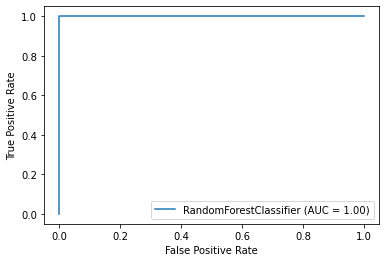

In [94]:
plot_roc_curve(RF,X,y)

In [95]:
# Machine Learning - Supervised Learning - CART - Multi Tree Model
# Ensemble Method - Boosting
# Algorithm - Gradient Boosting Machine
# GBM is developed to increase accuracy of models or boost wrong or weak
# learners towards right prediction
# Step 1 - Specify Number of trees to be built (n_estimators = 1000)
# Step 2 - Creates Sample 1 with 65% of observations and sqrt(num ofvariables)
# Step 3 - Build Decision Tree for Sample 1
# Step 4 - predict for Decision tree for sample 1

In [96]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gbm=GradientBoostingClassifier(n_estimators=1000)

In [98]:
gbmmodel=gbm.fit(X,y)

In [99]:
gbmmodel.score(X,y)

0.9468143336739162

In [100]:
cross_val_score(gbm,X,y,cv=5)

array([0.94207261, 0.93970078, 0.94161649, 0.94352705, 0.94033391])

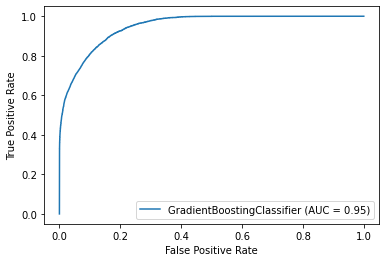

In [101]:
plot_roc_curve(gbm,X,y)

In [102]:
RFpredict=RFmodel.predict(hrtestdf)

In [103]:
pd.DataFrame(RFpredict).to_csv('RF.csv')

In [104]:
Gbmpredict=gbmmodel.predict(hrtestdf)

In [105]:
pd.DataFrame(Gbmpredict).to_csv('Gbm.csv')

In [106]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB

In [107]:
nb=GaussianNB()

In [108]:
nbmodel=nb.fit(X,y)

In [109]:
nbmodel.score(X,y)

0.9182783535250328

In [110]:
nbpredict=nb.predict(hrtestdf)

In [111]:
pd.DataFrame(nbpredict).to_csv('nb.csv')

In [112]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB

In [113]:
binarynb=BernoulliNB()

In [114]:
binarynbmodel=binarynb.fit(X,y)

In [115]:
binarynbmodel.score(X,y)

0.9123850532768939

In [116]:
binarypredict=binarynb.predict(hrtestdf)

In [117]:
pd.DataFrame(binarypredict).to_csv('binary.csv')